# ELEN0071-1 - Homework 1

## Instructions

- This homework must be carried out in groups of maximum 2 students.

- Each group must write a Python notebook (named `notebook.ipynb`) that contains the answer to all questions of the homework. Each group must submit a single *zip* archive  that contains the notebook and all input/output associated files on [Gradescope](https://www.gradescope.com/). 

- This homework is due by April 20, 2022 at 10pm. This is a hard deadline.


## Gradescope submission

- Each student should register on [Gradescope](https://www.gradescope.com/) using his or her `@student.uliege.be` address. If you don't see the class ELEN0071-1 on your dashboard, contact us on [Ed](https://edstem.org/us/dashboard) as soon as possible (don't wait the day before the deadline ;-). 

- Each group should submit a *zip* archive on [Gradescope](https://www.gradescope.com/). Make sure that all group members are correctly added to the submission!

If you are not familiar with Gradescope, please click on each step of the following guideline:
- [Code submission](https://help.gradescope.com/article/ccbpppziu9-student-submit-work#code_submissions), 
- [Adding group members](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).


## Question 1

Few years ago, Professor Sacré attended the TEDx talk Damien Ernst gave in Liège. He recorded his presentation with his phone. However, Professor Sacré's seat was far from the scene and the room had bad acoustic properties, resulting in a poor quality recording, stored in the file `./audio/TEDx_echo.wav`. Professor Sacré wants to broadcast it on *Holystone Radio* but he needs to process the signal first. More precisely, the signal is affected by an echo that needs to be removed. Since you are his best student, he kindly asks you to do this job for him in exchange for all his gratitude.

Let's call $y[n]$ the signal affected by echo. After some analyses, Professor Sacré was able to tell that the signal with echo had the structure $y[n] = x[n] + R \cdot x[n-D]$, where $x[n]$ is the signal without echo, $D$ is a delay expressed in number of samples, and $R \in (0,1)$. Professor Sacré also told you that the autocorrelation function $r_{y}[l]$ will help you fulfilling the next tasks. As a reminder, $r_{y}[l] = \sum\limits_{n=-\infty}^{+\infty}y[n]y[n-l]$.

**(a)** Listen to the audio signal `./audio/TEDx_echo.wav`. Load the signal within Python and plot it in the time domain (with the x-axis expressed in second).

**(b)** Compute the autocorrelation $r_{y}[l]$. Plot this autocorrelation for lags going from $-N+1$ to $N-1$. You should see three local maxima, one of those being located at $l=0$.

*Hint:* Use the function `numpy.correlate` with the parameter `mode="full"`. If $y[n]$ counts $N$ samples, the function `numpy.correlate` used in this mode returns $r_{y}[l]$ with $l\in[-N+1,N-1]$. 

**(c)** Show analytically that the autocorrelation function of signal $y[n]$ can be written as $r_{y}[l] = (1+R^2)r_{x}[l] + R r_{x}[l-D] + R r_{x}[l+D]$.

**(d)** Knowing that the autocorrelation of a signal is always maximum at 0 and looking at the relationship in (c), find the value of the delay $D$.

*Hint: Use of the function `peaks_detector` that is given to you.*

**(e)** Assuming that $r_{x}[\pm D]$ and $\, r_{x}[2D] \ll r_{x}[0]$ (*i.e.* $r_{x}[\pm D]$ and $r_{x}[2D]$ can be neglected), show analytically that $\frac{r_{y}[0]}{r_{y}[D]} \approx \frac{1+R^2}{R}$. Find numerically the value of $R$.


**(f)** Now that you found the values of $R$ and $D$, design a filter that removes the echo from the signal $y$. Give the expression of the transfer function $H(z)$ of this filter. Compute and plot the filtered signal using this filter. Also, listen to the signal and verify that the echo has been removed.

Format the filtered signal by executing the line `format_signal = numpy.int16(filtered_signal/numpy.max(numpy.abs(filtered_signal)) * 32767)` and save it into the file `./results/TEDx_without_echo.wav` using the function `scipy.io.wavfile.write`.

*Hint: This cannot be done in the time domain. Try to express $X(z)$ as a function of $Y(z)$.*




In [6]:
import numpy as np
from scipy.signal import find_peaks

# ===========================================================
# PEAKS DETECTOR
#
# This function detects the nb_peaks first biggest peaks in a
# vector vec. The magnitude of a peak is defined has the 
# difference between the value at the peak and the value of 
# its neighboor samples.
#
# ARGUMENTS:
#    * vec: 1D-array in which peaks needs to be search.
#    * nb_peaks: the number of peaks to detect.
#
# RETURN:
#    The indices of the nb_peaks found in vec
# ===========================================================
def peaks_detector(vec, nb_peaks=1):
    thrd = 0
    thrd_step = 0.001 * np.max(np.abs(vec))
    peaks_idx, prop = find_peaks(vec, threshold=thrd)
    
    while(len(peaks_idx) > nb_peaks):
        thrd += thrd_step
        peaks_idx, prop = find_peaks(vec, threshold=thrd)
        
    if len(peaks_idx) != nb_peaks:
        bound_a = thrd - thrd_step
        bound_b = thrd
        thrd = (bound_a + bound_b)/2
        peaks_idx, prop = find_peaks(vec, threshold=thrd)
        
        while(len(peaks_idx) != nb_peaks):
            if len(peaks_idx) < nb_peaks:
                bound_b = thrd
            else:
                bound_a = thrd
            
            bound_a = thrd - thrd_step
            bound_b = thrd
            thrd = (bound_a + bound_b)/2
            peaks_idx, prop = find_peaks(vec, threshold=thrd)
        
    return peaks_idx

### Solution Q1 (a)

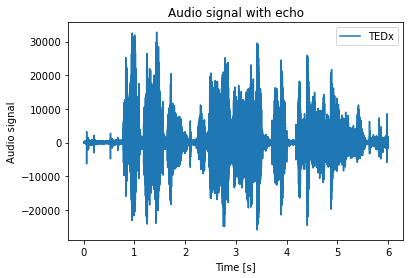

In [7]:
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

tedx_sample_rate, tedx_data = wavfile.read('./audio/TEDx_echo.wav')

n_tedx = len(tedx_data)

time_tedx = np.arange(0, n_tedx)/tedx_sample_rate

plt.figure()
plt.plot(time_tedx, tedx_data)
plt.title('Audio signal with echo')
plt.xlabel('Time [s]')
plt.ylabel('Audio signal')
plt.legend(['TEDx'])
plt.show()

### Solution Q1 (b)

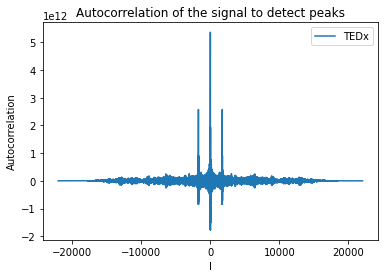

In [8]:
tedx_data_normalized = tedx_data/np.mean(tedx_data)

r_l = np.correlate(tedx_data_normalized, tedx_data_normalized, mode = 'full')

# Center the autocorrelation
n_r_l = np.linspace(((-tedx_sample_rate/2)+1),((tedx_sample_rate/2)-1),len(r_l))

plt.figure()
plt.plot(n_r_l,r_l)
plt.title('Autocorrelation of the signal to detect peaks')
plt.xlabel('l')
plt.ylabel('Autocorrelation')
plt.legend(['TEDx'])
plt.show()

### Solution Q1 (c)

Our signal can be expressed as :

\begin{equation*}
  y[n] = x[n] + R \cdot x[n-D]
\end{equation*}

By taking $n = n-l$

\begin{equation*}
  y[n-l] = x[n-l] + R \cdot x[n-l-D]
\end{equation*}

By taking into account the autocorrelation function :
\begin{align*}
  r_y[l] &= \sum_{n = - \infty}^{+ \infty} y[n]y[n-l]\\
  r_y[l] &= \sum_{n = - \infty}^{+ \infty} (x[n] + R \cdot x[n-D]) \cdot (x[n-l] + R \cdot x[n-l-D])\\
  r_y[l] &= \underbrace{\sum_{n = - \infty}^{+ \infty} (x[n] \cdot x[n-l])}_\text{autocorrelation $r_x[l]$} + \sum_{n = - \infty}^{+ \infty} (R \cdot x[n - D] \cdot x[n-l]) + \sum_{n = - \infty}^{+ \infty} (R \cdot x[n] \cdot x[n-l-D]) + \underbrace{\sum_{n = - \infty}^{+ \infty} (R^2 \cdot x[n-D] \cdot x[n-l-D])}_\text{$R^2 \cdot$ autocorrelation $r_x[l]$ delayed by D}
\end{align*}

Let's now determine the other dual product terms :

By taking a delay $D$ into consideration in $r_x[l]$ :
\begin{equation*}
  r_x[l-D] = \sum_{n = - \infty}^{+ \infty}(x[n] \cdot x[n-(l-D)]) = \sum_{n = - \infty}^{+ \infty}(x[n] \cdot x[n-l+D])
\end{equation*}

Which is the second term of the dual product.

On the opposite :
\begin{equation*}
  r_x[l+D] = \sum_{n = - \infty}^{+ \infty}(x[n] \cdot x[n-(l+D)]) = \sum_{n = - \infty}^{+ \infty} (x[n] \cdot x[n-l-D])
\end{equation*}

Which is the third term of the dual product.

By combining everything together we find :
\begin{align*}
  r_y[l] & = r_x[l] + R \cdot r_x[l-D] + R \cdot r_x[l+D] + R^2 \cdot r_x[l] \\
  &= (1+R^2) r_x[l] + R \cdot r_x[l-D] + R \cdot r_x[l+D] 
\end{align*}

Which was the expected result.

### Solution Q1 (d)

In [9]:
# Detect peaks using provided function
peaks = peaks_detector(r_l,3)

# Compute the delays
delay_1 = peaks[1] - peaks[0]
delay_2 = peaks[2] - peaks[1]

print('First delay = ', delay_1)
print('Second delay = ', delay_2)

First delay =  20727
Second delay =  20727


### Solution Q1 (e)

In [11]:
# Simply solve 2nd degree equation R^2 - (r_l[0]/r_l[D])R + 1 = 0

r_l_ratio = r_l[peaks[1]]/r_l[peaks[2]]

delta = r_l_ratio**2 - 4
R_1 = (r_l_ratio + sqrt(delta))/2
R_2 = (r_l_ratio - sqrt(delta))/2

print('R_1 = ',R_1)
print('R_2 = ',R_2)
print('R_1 needs to be excluded for being outside of accepted range')


R_1 =  1.3337824950143666
R_2 =  0.7497474316374415
R_1 needs to be excluded for being outside of accepted range


### Solution Q1 (f)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=167b1c1a-b4a9-423c-9bda-84291e0c5320' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>